# AUTOENCODERS
#### This notebook builds a *Neural Network model* from scratch and *trains* it.
***
***
## Import Packages and Data

In [2]:
"""
Import Packages
"""

from keras.layers import Dense, Input, Activation, Flatten
from keras.models import Model, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [4]:
"""
Import Data
"""

df = pd.read_pickle('final.pkl')
desc = pd.read_pickle('clean.pkl')
print(df.shape)
print(desc.shape)

(1460, 276)
(1460, 315)


***
***
## Split Data

In [5]:
"""
Split data into train and test
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, df,
                                                    test_size=0.3,
                                                    random_state=42)

***
***
## Model Experiments
***
### Architecture 1
* **encoder_1** : *original data space is mapped to latent subspace and represented in this model*
* **autoencoder** : *original data space is mapped to latent subspace and reconstructed to original data space in this model* 
* **Architecture 1** has *9* layers : 1 *input*, 1 *output*, 1 *encoded layer*, 6 other *hidden layers*.
* **autoencoder** is compiled with **adam** *optimizer* and *loss function* is **mean squared error**


In [4]:
"""
Architecture No. 1
"""

input_dim = len(df.columns)

encoder_inputs = Input(shape=(input_dim,), name='Input')

hidden_1 = Dense(200, activation='relu', name='1st_Hidden')(encoder_inputs)

hidden_2 = Dense(150, activation='relu', name='2nd_Hidden')(hidden_1)

hidden_3 = Dense(70, activation='relu', name='3rd_Hidden')(hidden_2)

hidden_4 = Dense(10, activation='relu', name='4th_Hidden')(hidden_3)

output_encoded = Dense(2, activation='relu', name='Output_Encoded')(hidden_4)

hidden_5 = Dense(50, activation='relu', name='5th_Hidden')(output_encoded)

hidden_6 = Dense(160, activation='relu', name='6th_Hidden')(hidden_5)

output = Dense(input_dim, activation='relu', name='Output')(hidden_6)

encoder_1 = Model(encoder_inputs, output_encoded)
autoencoder = Model(encoder_inputs, output)

In [5]:
batch_size = 64
epochs = 50
autoencoder.compile(optimizer='adam',
                loss='mse')
autoencoder.fit(x_train, y_train, 
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/50
1022/1022 [==============================] - 0s 312us/step - loss: 0.2478
Epoch 2/50
1022/1022 [==============================] - 0s 58us/step - loss: 0.2143
Epoch 3/50
1022/1022 [==============================] - 0s 55us/step - loss: 0.2004
Epoch 4/50
1022/1022 [==============================] - 0s 55us/step - loss: 0.1938
Epoch 5/50
1022/1022 [==============================] - 0s 60us/step - loss: 0.1916
Epoch 6/50
1022/1022 [==============================] - 0s 58us/step - loss: 0.1878
Epoch 7/50
1022/1022 [==============================] - 0s 55us/step - loss: 0.1862
Epoch 8/50
1022/1022 [==============================] - 0s 53us/step - loss: 0.1849
Epoch 9/50
1022/1022 [==============================] - 0s 53us/step - loss: 0.1841
Epoch 10/50
1022/1022 [==============================] - 0s 52us/step - loss: 0.1834
Epoch 11/50
1022/1022 [==============================] - 0s 52us/step - loss: 0.1822
Epoch 12/50
1022/1022 [==============================] - 0s 53us/step - l

In [6]:
"""
Get the encoded representation of Housing data
"""

encoded_data = encoder_1.predict(x_test)

In [7]:
encoded_data

array([[ 9.423725 ,  8.4807625],
       [17.513828 ,  6.6003494],
       [ 5.252065 , 12.400116 ],
       [ 6.914516 , 10.092717 ],
       [19.324532 ,  7.34704  ],
       [ 6.492669 ,  8.301283 ],
       [ 5.6333237, 11.02349  ],
       [ 9.980113 ,  7.301482 ],
       [ 6.582145 ,  8.097282 ],
       [ 7.8411202,  9.161939 ],
       [ 6.8307076, 10.839654 ],
       [ 8.988539 ,  8.489785 ],
       [ 6.006047 ,  8.207664 ],
       [17.302908 ,  8.153371 ],
       [13.750671 ,  7.9677253],
       [ 8.620465 ,  9.092334 ],
       [14.878415 ,  8.138175 ],
       [ 8.671358 ,  8.516964 ],
       [ 4.840483 , 11.57828  ],
       [15.732796 ,  7.712022 ],
       [ 8.195239 ,  7.183296 ],
       [16.042313 ,  8.427081 ],
       [14.205948 ,  7.996501 ],
       [ 6.319987 , 10.8936405],
       [15.8754425,  7.8398294],
       [13.137508 ,  7.4045844],
       [15.777901 ,  7.8201094],
       [ 7.715421 ,  9.2612095],
       [13.192793 ,  7.867993 ],
       [15.415364 ,  7.5401716],
       [ 7

### Visualization

Text(0.5, 1.0, 'Sale Price Plot')

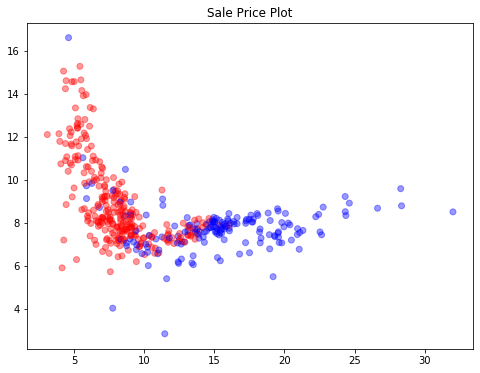

In [8]:
display(Markdown('### Visualization'))
plt.figure(figsize=(8,6))

colors = desc.loc[x_test.index]
colors = np.where(colors.SalePrice < colors.SalePrice.mean(), 'r', 'b')

plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=colors, alpha=0.4)
plt.title('Sale Price Plot')

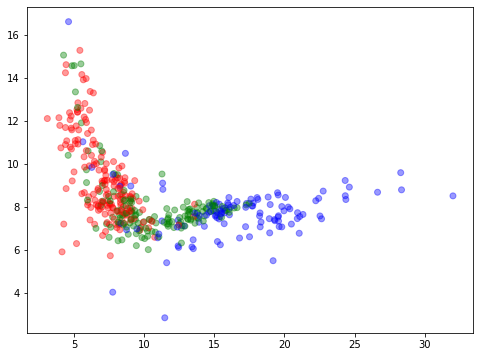

In [9]:
quantiles = desc.loc[x_test.index]
quantiles = np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.4), 'r',
                     np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.75), 'g', 'b'))

plt.figure(figsize=(8,6))
plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=quantiles, alpha=0.4)

In [10]:
"""
Free up memory space
"""

del autoencoder
del encoder_1

***
### Architecture 2
* **encoder_2** : *original data space is mapped to latent subspace and represented in this model*
* **autoencoder_2** : *original data space is mapped to latent subspace and reconstructed to original data space in this model* 
* **Architecture 2** has *9* layers : 1 *input*, 1 *output*, 1 *encoded layer*, 6 other *hidden layers*.
* **autoencoder** is compiled with **adam** *optimizer* and *loss function* is **mean squared error**
* **autoencoder** uses **linear** *activation function*

In [11]:
"""
Architecture No. 2
"""

input_dim = len(df.columns)

encoder_inputs_1 = Input(shape=(input_dim,), name='Input')

hidden_1_1 = Dense(200, activation='linear', name='1st_Hidden')(encoder_inputs_1)

hidden_1_2 = Dense(150, activation='linear', name='2nd_Hidden')(hidden_1_1)

hidden_1_3 = Dense(70, activation='linear', name='3rd_Hidden')(hidden_1_2)

hidden_1_4 = Dense(10, activation='linear', name='4th_Hidden')(hidden_1_3)

output_encoded_1 = Dense(2, activation='linear', name='Output_Encoded')(hidden_1_4)

hidden_1_5 = Dense(50, activation='linear', name='5th_Hidden')(output_encoded_1)

hidden_1_6 = Dense(160, activation='linear', name='6th_Hidden')(hidden_1_5)

output_1 = Dense(input_dim, activation='linear', name='Output')(hidden_1_6)

encoder_2 = Model(encoder_inputs_1, output_encoded_1)
autoencoder_2 = Model(encoder_inputs_1, output_1)

In [12]:
batch_size = 64
epochs = 50
autoencoder_2.compile(optimizer='adam',
                loss='mse')
autoencoder_2.fit(df, df, 
                  epochs=epochs,
                  batch_size=batch_size,
                  shuffle=True)

Epoch 1/50
1460/1460 [==============================] - 0s 218us/step - loss: 0.2254
Epoch 2/50
1460/1460 [==============================] - 0s 56us/step - loss: 0.1555
Epoch 3/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1518
Epoch 4/50
1460/1460 [==============================] - 0s 53us/step - loss: 0.1515
Epoch 5/50
1460/1460 [==============================] - 0s 53us/step - loss: 0.1514
Epoch 6/50
1460/1460 [==============================] - 0s 54us/step - loss: 0.1513
Epoch 7/50
1460/1460 [==============================] - 0s 53us/step - loss: 0.1513
Epoch 8/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1515
Epoch 9/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1511
Epoch 10/50
1460/1460 [==============================] - 0s 54us/step - loss: 0.1511
Epoch 11/50
1460/1460 [==============================] - 0s 54us/step - loss: 0.1510
Epoch 12/50
1460/1460 [==============================] - 0s 51us/step - l

In [14]:
"""
Get the encoded representation of Housing data
"""

encoded_data = encoder_2.predict(x_test)
encoded_data

array([[-1.96359754e-02,  1.84376824e+00],
       [-1.78892910e+00,  1.22258678e-01],
       [ 6.71360791e-01,  1.73667538e+00],
       [ 2.53209114e-01,  7.79610634e-01],
       [-2.17772746e+00,  1.57930267e+00],
       [ 6.94645166e-01,  2.69973469e+00],
       [-4.16243792e-01,  2.52424836e-01],
       [ 2.41338462e-02,  7.99262643e-01],
       [ 7.18567193e-01,  2.66704512e+00],
       [ 5.44161320e-01,  8.91625762e-01],
       [ 6.74834073e-01,  9.23768282e-01],
       [ 1.65144697e-01,  2.16614890e+00],
       [-1.48029774e-02,  1.69183111e+00],
       [-1.24579740e+00,  1.24954689e+00],
       [-5.79353631e-01,  5.27734399e-01],
       [ 5.98330647e-02,  2.14627981e+00],
       [-7.41141975e-01,  4.54568267e-01],
       [ 2.87479013e-02,  1.96463072e+00],
       [ 7.03030527e-01,  1.62050974e+00],
       [-1.55640852e+00,  1.56810272e+00],
       [-6.24463558e-01,  1.38075387e+00],
       [-7.88577676e-01,  6.31584764e-01],
       [-7.82994449e-01,  9.22569513e-01],
       [ 1.

### Visualizations

Text(0.5, 1.0, 'Sale Price Plot')

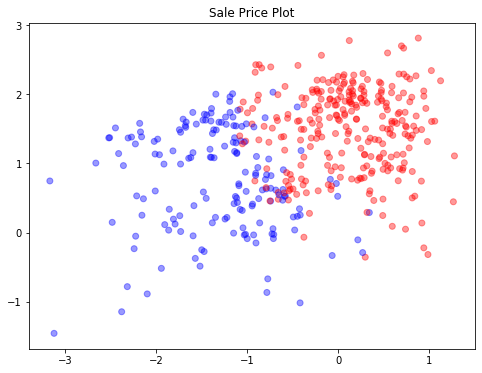

In [15]:
plt.figure(figsize=(8,6))

colors = desc.loc[x_test.index]
colors = np.where(colors.SalePrice < colors.SalePrice.mean(), 'r', 'b')

plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=colors, alpha=0.4)
plt.title('Sale Price Plot')

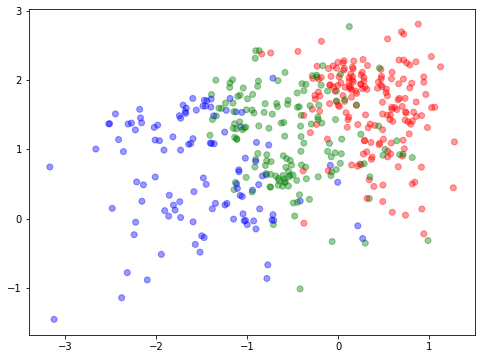

In [16]:
quantiles = desc.loc[x_test.index]
quantiles = np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.4), 'r',
                     np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.75), 'g', 'b'))

plt.figure(figsize=(8,6))
plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=quantiles, alpha=0.4)

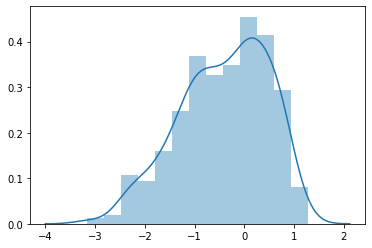

In [17]:
sns.distplot(encoded_data.T[0])

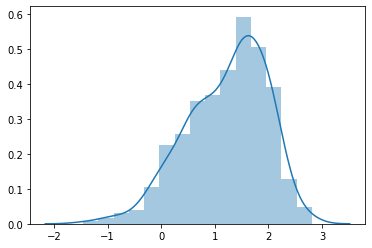

In [18]:
sns.distplot(encoded_data.T[1])

In [19]:
"""
Save model to disk
"""
encoder_2.save('models/model2.h5')

"""
Free up memory
"""

del autoencoder_2
del encoder_2

***
### Architecture 3
* **encoder_3** : *original data space is mapped to latent subspace and represented in this model*
* **autoencoder_3** : *original data space is mapped to latent subspace and reconstructed to original data space in this model* 
* **Architecture 3** has *9* layers : 1 *input*, 1 *output*, 1 *encoded layer*, 6 other *hidden layers*.
* **autoencoder** is compiled with **rmsprop** *optimizer* and *loss function* is **mean squared error**

In [28]:
"""
Architecture 3
"""

input_dim = len(df.columns)

encoder_inputs_1 = Input(shape=(input_dim,), name='Input')

hidden_1_1 = Dense(200, activation='linear', name='1st_Hidden')(encoder_inputs_1)

hidden_1_2 = Dense(100, activation='linear', name='2nd_Hidden')(hidden_1_1)

hidden_1_3 = Dense(30, activation='linear', name='3rd_Hidden')(hidden_1_2)

output_encoded_1 = Dense(2, activation='sigmoid', name='Output_Encoded')(hidden_1_3)

hidden_1_4 = Dense(30, activation='linear', name='5th_Hidden')(output_encoded_1)

hidden_1_5 = Dense(100, activation='linear', name='6th_Hidden')(hidden_1_4)

output_1 = Dense(input_dim, activation='linear', name='Output')(hidden_1_5)

encoder_3 = Model(encoder_inputs_1, output_encoded_1)
autoencoder_3 = Model(encoder_inputs_1, output_1)

In [10]:
def standardise(matrix):
    input_dim = matrix.columns
    for col in input_dim:
        matrix[col] = (matrix[col] - matrix[col].min()) / (matrix[col].max() - matrix[col].min())
    return matrix

In [29]:
matrix = standardise(df)
batch_size = 64
epochs = 60
autoencoder_3.compile(optimizer='rmsprop',
                loss='mse')
autoencoder_3.fit(matrix, matrix, 
                  epochs=epochs,
                  batch_size=batch_size,
                  shuffle=True)

Epoch 1/60
1460/1460 [==============================] - 0s 152us/step - loss: 0.0958
Epoch 2/60
1460/1460 [==============================] - 0s 37us/step - loss: 0.0513
Epoch 3/60
1460/1460 [==============================] - 0s 42us/step - loss: 0.0473
Epoch 4/60
1460/1460 [==============================] - 0s 44us/step - loss: 0.0467
Epoch 5/60
1460/1460 [==============================] - 0s 43us/step - loss: 0.0464
Epoch 6/60
1460/1460 [==============================] - 0s 43us/step - loss: 0.0463
Epoch 7/60
1460/1460 [==============================] - 0s 43us/step - loss: 0.0461
Epoch 8/60
1460/1460 [==============================] - 0s 40us/step - loss: 0.0462
Epoch 9/60
1460/1460 [==============================] - 0s 48us/step - loss: 0.0460
Epoch 10/60
1460/1460 [==============================] - 0s 50us/step - loss: 0.0460
Epoch 11/60
1460/1460 [==============================] - 0s 48us/step - loss: 0.0460
Epoch 12/60
1460/1460 [==============================] - 0s 43us/step - l

In [30]:
"""
Get the encoded representation of Housing data
"""

encoded_data = encoder_3.predict(x_test)
encoded_data

array([[0.8323437 , 0.62669367],
       [0.35258073, 0.908013  ],
       [0.74740714, 0.14068536],
       [0.7024928 , 0.21086615],
       [0.26750165, 0.83392346],
       [0.6748309 , 0.34491125],
       [0.49079803, 0.66569114],
       [0.63384193, 0.46499163],
       [0.7354307 , 0.3501338 ],
       [0.7249786 , 0.30789778],
       [0.68855447, 0.12941894],
       [0.85016346, 0.5870582 ],
       [0.6637211 , 0.35328642],
       [0.21185242, 0.71427804],
       [0.26612303, 0.49132583],
       [0.7563766 , 0.4262965 ],
       [0.13845925, 0.5128249 ],
       [0.750008  , 0.5466    ],
       [0.7350206 , 0.1251926 ],
       [0.23392968, 0.79372674],
       [0.7870049 , 0.722002  ],
       [0.11160587, 0.37995246],
       [0.14580138, 0.53580797],
       [0.78679127, 0.48825502],
       [0.2027799 , 0.6571121 ],
       [0.29174322, 0.5522895 ],
       [0.13703927, 0.6162453 ],
       [0.67339057, 0.35099113],
       [0.2947579 , 0.5824474 ],
       [0.10786264, 0.3764146 ],
       [0.

### Visualizations

Text(0.5, 1.0, 'Sale Price Plot')

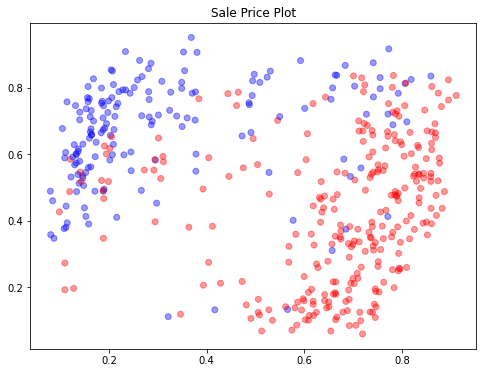

In [35]:
display(Markdown('### Visualizations'))

plt.figure(figsize=(8,6))

colors = desc.loc[x_test.index]
colors = np.where(colors.SalePrice <= colors.SalePrice.mean(), 'r', 'b')

plt.scatter(encoded_data[:,0], encoded_data[:,1],
            c=colors, alpha=0.4)
plt.title('Sale Price Plot')

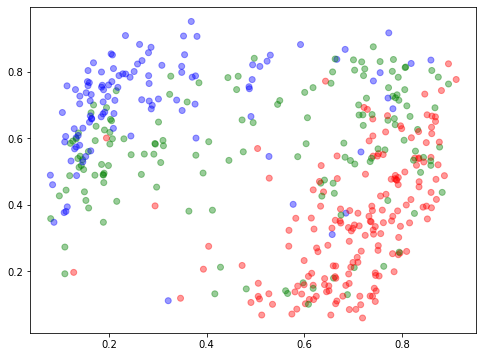

In [32]:
quantiles = desc.loc[x_test.index]
quantiles = np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.4), 'r',
                     np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.75), 'g', 'b'))

plt.figure(figsize=(8,6))
plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=quantiles, alpha=0.4)

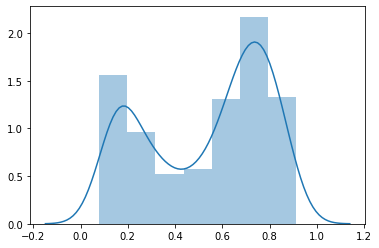

In [33]:
sns.distplot(encoded_data.T[0])

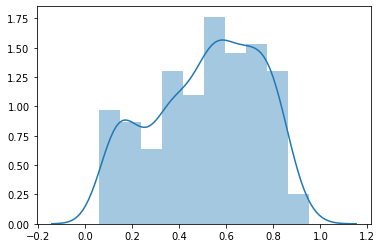

In [34]:
sns.distplot(encoded_data.T[1])

In [27]:
"""
Save model to disk
"""

encoder_3.save('models/model3.h5')

"""
Free memory space
"""

del autoencoder_3
del encoder_3

***
### Architecture 4
* **encoder_4** : *original data space is mapped to latent subspace and represented in this model*
* **autoencoder_4** : *original data space is mapped to latent subspace and reconstructed to original data space in this model* 
* **Architecture 4** has *9* layers : 1 *input*, 1 *output*, 1 *encoded layer*, 6 other *hidden layers*.
* **autoencoder** is compiled with **rmsprop** *optimizer* and *loss function* is **mean squared error**

In [28]:
"""
Model No. 4
"""

input_dim = len(df.columns)

encoder_inputs_1 = Input(shape=(input_dim,), name='Input')

hidden_1_1 = Dense(200, activation='linear', name='1st_Hidden')(encoder_inputs_1)

hidden_1_2 = Dense(130, activation='linear', name='2nd_Hidden')(hidden_1_1)

hidden_1_3 = Dense(60, activation='linear', name='3rd_Hidden')(hidden_1_2)

output_encoded_1 = Dense(2, activation='sigmoid', name='Output_Encoded')(hidden_1_3)

hidden_1_4 = Dense(60, activation='linear', name='4th_Hidden')(output_encoded_1)

hidden_1_5 = Dense(130, activation='linear', name='5th_Hidden')(hidden_1_4)

hidden_1_6 = Dense(200, activation='linear', name='6th_Hidden')(hidden_1_5)

output_1 = Dense(input_dim, activation='linear', name='Output')(hidden_1_6)

encoder_4 = Model(encoder_inputs_1, output_encoded_1)
autoencoder_4 = Model(encoder_inputs_1, output_1)

In [29]:
batch_size = 64
epochs = 60
autoencoder_4.compile(optimizer='rmsprop',
                loss='mse')
autoencoder_4.fit(df, df, 
                  epochs=epochs,
                  batch_size=batch_size,
                  shuffle=True)

Epoch 1/60
1460/1460 [==============================] - 0s 175us/step - loss: 0.1989
Epoch 2/60
1460/1460 [==============================] - 0s 53us/step - loss: 0.1855
Epoch 3/60
1460/1460 [==============================] - 0s 51us/step - loss: 0.1751
Epoch 4/60
1460/1460 [==============================] - 0s 52us/step - loss: 0.1569
Epoch 5/60
1460/1460 [==============================] - 0s 51us/step - loss: 0.1548
Epoch 6/60
1460/1460 [==============================] - 0s 50us/step - loss: 0.1543
Epoch 7/60
1460/1460 [==============================] - 0s 49us/step - loss: 0.1540
Epoch 8/60
1460/1460 [==============================] - 0s 50us/step - loss: 0.1537
Epoch 9/60
1460/1460 [==============================] - 0s 53us/step - loss: 0.1536
Epoch 10/60
1460/1460 [==============================] - 0s 52us/step - loss: 0.1531
Epoch 11/60
1460/1460 [==============================] - 0s 51us/step - loss: 0.1531
Epoch 12/60
1460/1460 [==============================] - 0s 51us/step - l

In [30]:
"""
Get the encoded representation of Housing data
"""

encoded_data = encoder_4.predict(x_test)
encoded_data

array([[0.68839073, 0.30953023],
       [0.29350185, 0.7193247 ],
       [0.61676323, 0.17850327],
       [0.39961606, 0.2623841 ],
       [0.69966483, 0.7861306 ],
       [0.8400529 , 0.17797334],
       [0.29546875, 0.39008388],
       [0.40415925, 0.31962273],
       [0.8341235 , 0.16767652],
       [0.41428456, 0.20679292],
       [0.4145949 , 0.17796725],
       [0.744133  , 0.25905526],
       [0.66387385, 0.32440698],
       [0.5838889 , 0.5753052 ],
       [0.36497915, 0.44855392],
       [0.7442741 , 0.2835944 ],
       [0.36090183, 0.481563  ],
       [0.71116805, 0.29300836],
       [0.59768254, 0.16585667],
       [0.68609226, 0.6428319 ],
       [0.60533243, 0.4459635 ],
       [0.40111902, 0.4950841 ],
       [0.4907398 , 0.48027214],
       [0.77777904, 0.26372343],
       [0.6817017 , 0.5934991 ],
       [0.6700326 , 0.46501404],
       [0.62271976, 0.55684966],
       [0.7135408 , 0.2675851 ],
       [0.37220478, 0.45453268],
       [0.58188003, 0.5528522 ],
       [0.

### Visualizations

Text(0.5, 1.0, 'Sale Price Plot')

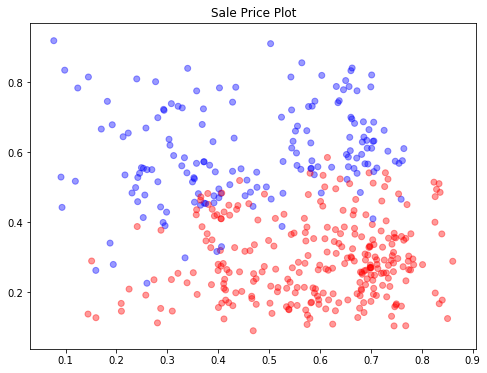

In [31]:
display(Markdown('### Visualizations'))

plt.figure(figsize=(8,6))

colors = desc.loc[x_test.index]
colors = np.where(colors.SalePrice < colors.SalePrice.mean(), 'r', 'b')

plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=colors, alpha=0.4)
plt.title('Sale Price Plot')

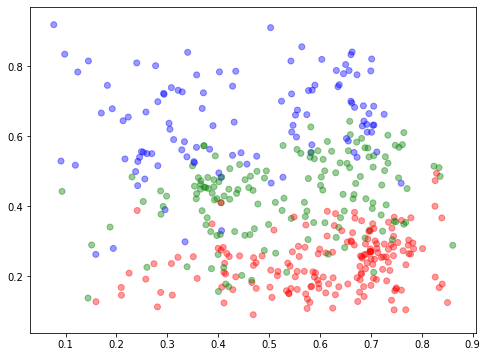

In [32]:
quantiles = desc.loc[x_test.index]
quantiles = np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.4), 'r',
                     np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.75), 'g', 'b'))

plt.figure(figsize=(8,6))
plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=quantiles, alpha=0.4)

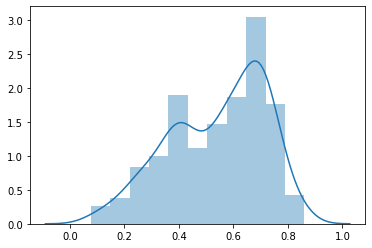

In [33]:
sns.distplot(encoded_data.T[0])

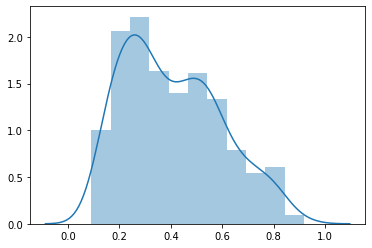

In [34]:
sns.distplot(encoded_data.T[1])

In [35]:
"""
Save model to disk
"""

encoder_4.save('models/model4.h5')

"""
Free Memory
"""

del encoder_4
del autoencoder_4

***
### Architecture 5
* **encoder_5** : *original data space is mapped to latent subspace and represented in this model*.
* **autoencoder_5** : *original data space is mapped to latent subspace and reconstructed to original data space in this model* .
* **Architecture 5** has *8* layers : 1 *input*, 1 *output*, 1 *encoded layer*, 6 other *hidden layers*.
* **autoencoder** is compiled with **rmsprop** *optimizer* and *loss function* is **mean squared error**.
* **encoder layer** uses an *activity regularizer* **l1**.

In [36]:
"""
I am using the same architecture as that of Architecture 2, just adding activity_regularizer to the encoded layer
"""

from keras import regularizers

input_dim = len(df.columns)

encoder_inputs_1 = Input(shape=(input_dim,), name='Input')

hidden_1_1 = Dense(200, activation='linear', name='1st_Hidden')(encoder_inputs_1)

hidden_1_2 = Dense(150, activation='linear', name='2nd_Hidden')(hidden_1_1)

hidden_1_3 = Dense(70, activation='linear', name='3rd_Hidden')(hidden_1_2)

hidden_1_4 = Dense(10, activation='linear', name='4th_Hidden')(hidden_1_3)

output_encoded_1 = Dense(2, activation='linear', name='Output_Encoded',
                         activity_regularizer=regularizers.l1(0.00001))(hidden_1_4)

hidden_1_5 = Dense(50, activation='linear', name='5th_Hidden')(output_encoded_1)

hidden_1_6 = Dense(160, activation='linear', name='6th_Hidden')(hidden_1_5)

output_1 = Dense(input_dim, activation='linear', name='Output')(hidden_1_6)

encoder_5 = Model(encoder_inputs_1, output_encoded_1)
autoencoder_5 = Model(encoder_inputs_1, output_1)

In [37]:
batch_size = 64
epochs = 50
autoencoder_5.compile(optimizer='adam',
                loss='mse')
autoencoder_5.fit(df, df, 
                  epochs=epochs,
                  batch_size=batch_size,
                  shuffle=True)

Epoch 1/50
1460/1460 [==============================] - 0s 220us/step - loss: 0.2387
Epoch 2/50
1460/1460 [==============================] - 0s 54us/step - loss: 0.1580
Epoch 3/50
1460/1460 [==============================] - 0s 55us/step - loss: 0.1538
Epoch 4/50
1460/1460 [==============================] - 0s 54us/step - loss: 0.1531
Epoch 5/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1529
Epoch 6/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1534
Epoch 7/50
1460/1460 [==============================] - 0s 49us/step - loss: 0.1546
Epoch 8/50
1460/1460 [==============================] - 0s 50us/step - loss: 0.1532
Epoch 9/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1524
Epoch 10/50
1460/1460 [==============================] - 0s 52us/step - loss: 0.1520
Epoch 11/50
1460/1460 [==============================] - 0s 55us/step - loss: 0.1517
Epoch 12/50
1460/1460 [==============================] - 0s 54us/step - l

In [38]:
"""
Get the encoded representation of Housing data
"""

encoded_data = encoder_5.predict(x_test)
encoded_data

array([[ 2.94641942e-01,  1.65200472e-01],
       [-3.79231393e-01, -7.07730949e-01],
       [ 2.02850953e-01,  3.96393836e-01],
       [-1.28387481e-01,  1.40542075e-01],
       [ 2.00198323e-01, -7.35993624e-01],
       [ 5.27258217e-01,  4.38781053e-01],
       [-3.45682293e-01, -1.36833131e-01],
       [-1.45596370e-01,  4.40596938e-02],
       [ 5.05110979e-01,  4.72265273e-01],
       [-1.01587281e-01,  2.59643555e-01],
       [-9.22041982e-02,  3.21664870e-01],
       [ 3.66845012e-01,  2.59295523e-01],
       [ 2.11392492e-01,  1.07309639e-01],
       [ 5.26355915e-02, -3.88785809e-01],
       [-2.41090596e-01, -2.12242484e-01],
       [ 3.74550343e-01,  2.22798824e-01],
       [-2.42350474e-01, -2.80462116e-01],
       [ 3.16877991e-01,  1.93557978e-01],
       [ 1.52637243e-01,  3.93429846e-01],
       [ 1.81803197e-01, -4.72047091e-01],
       [ 8.99467766e-02, -1.04092538e-01],
       [-1.83190718e-01, -2.77760327e-01],
       [-7.47537687e-02, -2.41939843e-01],
       [ 4.

### Visualizations

Text(0.5, 1.0, 'Sale Price Plot')

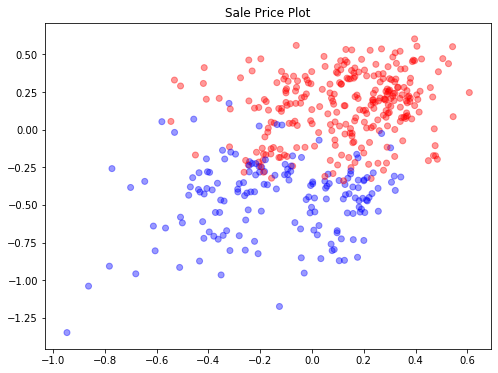

In [39]:
display(Markdown('### Visualizations'))

plt.figure(figsize=(8,6))

colors = desc.loc[x_test.index]
colors = np.where(colors.SalePrice < colors.SalePrice.mean(), 'r', 'b')

plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=colors, alpha=0.4)
plt.title('Sale Price Plot')

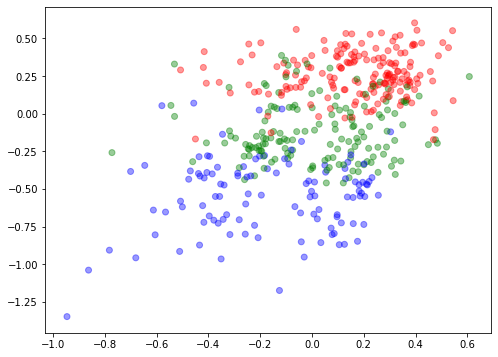

In [40]:
quantiles = desc.loc[x_test.index]
quantiles = np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.4), 'r',
                     np.where(quantiles.SalePrice < quantiles.SalePrice.quantile(0.75), 'g', 'b'))

plt.figure(figsize=(8,6))
plt.scatter(encoded_data.T[0], encoded_data.T[1],
            c=quantiles, alpha=0.4)

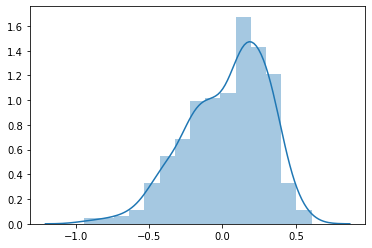

In [41]:
sns.distplot(encoded_data.T[0])

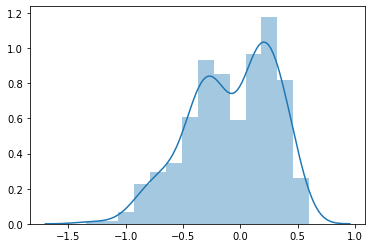

In [42]:
sns.distplot(encoded_data.T[1])

***